# Jul 4th, 2022 (Fig-7: Entropy -- draft)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [2]:
nn = 512
fig_dir = 'Fig7_Entropy'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512/Fig7_Entropy

## Prepare (512)

In [3]:
mice = Mice(nn)
pal, _BOLD, _CAS, _CAF = prepare_palette(0.6)

In [4]:
task = 'rest'

num_k, p = 7, 20
perc = f'p{p}-sample'
props_base = {
    'kw_kmeans': {'n_init': 100},
    'perc': perc,
    'num_k': num_k,
    'mice': mice,
    'task': task,
    'metric': 'pearson',
    'match_using': 'gam',
    'match_metric': 'euclidean',
    'graph_type': 'real',
    'verbose': False,
}
props_ca = {'mode': 'ca2', **props_base}
props_bo = {'mode': 'bold-lite', **props_base}

bt = BootStrap(**props_ca)
bt_bo = BootStrap(**props_bo)

mice.setup_func_data(task, band_ca=(0.01, 0.5))
bt_cas = BootStrap(**props_ca)

mice.setup_func_data(task, band_ca=0.5)
bt_caf = BootStrap(**props_ca)

bt_dict = {
    _BOLD: bt_bo,
    _CAS: bt_cas,
    _CAF: bt_caf,
}

## Entropy

In [5]:
bt_bo = BootStrap(**props_bo)

mice.setup_func_data(task, band_ca=(0.01, 0.5))
bt_cas = BootStrap(**props_ca)

mice.setup_func_data(task, band_ca=0.5)
bt_caf = BootStrap(**props_ca)

bt_dict = {
    _BOLD: bt_bo,
    _CAS: bt_cas,
    _CAF: bt_caf,
}

In [6]:
_bt_bo = BootStrap(**props_bo)

mice.setup_func_data(task, band_ca=(0.01, 0.5))
_bt_cas = BootStrap(**props_ca)

mice.setup_func_data(task, band_ca=0.5)
_bt_caf = BootStrap(**props_ca)

bt_dict_raw = {
    _BOLD: _bt_bo,
    _CAS: _bt_cas,
    _CAF: _bt_caf,
}

### Prune vs Raw

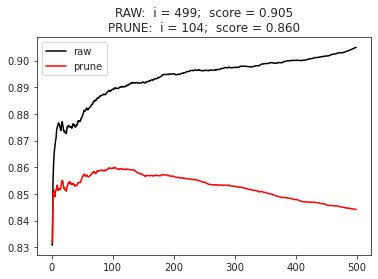

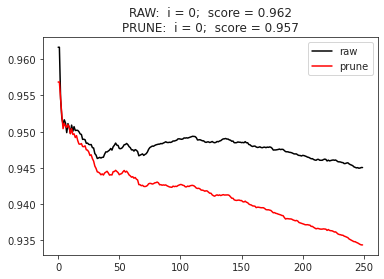

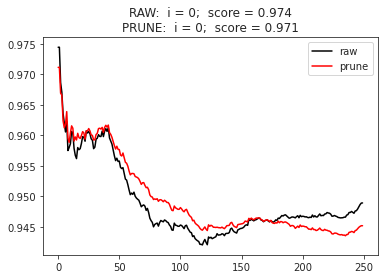

CPU times: user 9min 10s, sys: 1min 22s, total: 10min 32s
Wall time: 10min 32s


In [7]:
%%time

for mode, o in bt_dict.items():
    scores, i = bt_dict_raw[mode].compute_entropy(use_prune=False, select_seeds=True)
    plt.plot(scores, color='k', label='raw')
    title = f"RAW:  i = {i};  score = {scores[i]:0.3f}\n"
    
    scores, i = o.compute_entropy(use_prune=True, select_seeds=True)
    plt.plot(scores, color='r', label='prune')
    
    title += f"PRUNE:  i = {i};  score = {scores[i]:0.3f}"
    plt.title(title)
    plt.legend()
    plt.show()

In [9]:
from figures.fig7 import dist_ent_inset as go

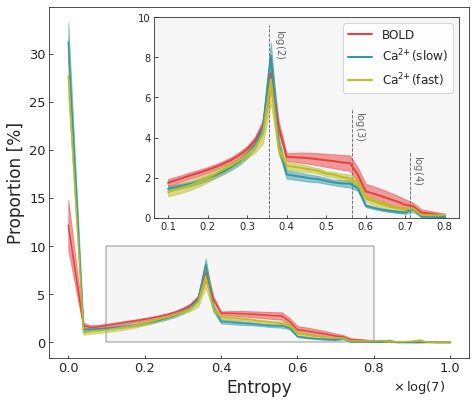

In [10]:
cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e2)))
fig, _ = go(cut, se, xs, num_k, True)

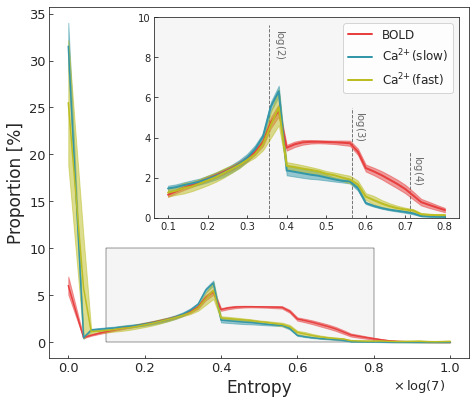

In [11]:
cut, se, bins, xs = cut4figs('h', bt_dict_raw, bt.get_booter(int(1e2)))
fig, _ = go(cut, se, xs, num_k, True)

In [12]:
ent = {mode: avg(o.run_h, 1) for mode, o in bt_dict.items()}
{mode: bt.symmetry_score(avg(h, 1))[0][-1] for mode, h in ent.items()}

{'BOLD': 0.86, 'Ca$^{2\\!\\!+}$(slow)': 0.957, 'Ca$^{2\\!\\!+}$(fast)': 0.971}

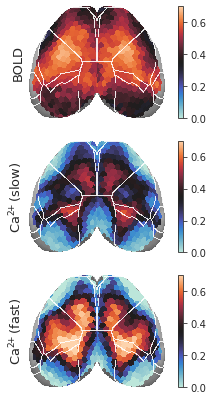

In [13]:
_ = bt.show(
    data=ent,
    figsize=(5, 7),
    vmin=0,
    vmax=0.7,
    add_disjoint=False,
    cmap='icefire',
    cbar=True,
)

In [14]:
ent = {mode: avg(o.run_h, 1) for mode, o in bt_dict_raw.items()}
{mode: bt.symmetry_score(avg(h, 1))[0][-1] for mode, h in ent.items()}

{'BOLD': 0.905, 'Ca$^{2\\!\\!+}$(slow)': 0.962, 'Ca$^{2\\!\\!+}$(fast)': 0.974}

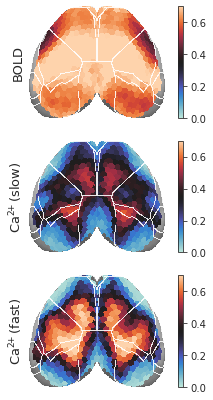

In [15]:
_ = bt.show(
    data=ent,
    figsize=(5, 7),
    vmin=0,
    vmax=0.7,
    add_disjoint=False,
    cmap='icefire',
    cbar=True,
)

In [26]:
contour = bt.get_contour(0.2, False)

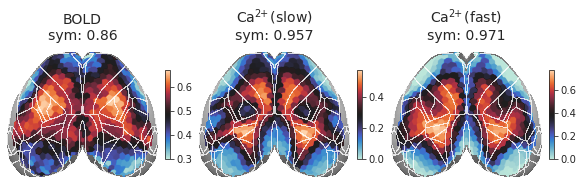

In [27]:
ent = {mode: avg(o.run_h, 1) for mode, o in bt_dict.items()}

fig, axes = create_figure(1, 3, (8, 2.8), tight_layout=False, constrained_layout=True)
for ax, (mode, x) in zip(axes.flat, ent.items()):
    if mode == _BOLD:
        vmin = np.nanmin(x)
        vmin = 0.3
    else:
        vmin = 0
    vmax = np.nanmax(x)
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    ax.set_title(mode, y=1.05, fontsize=14)
    ax.set_title(f"{mode}\nsym: {bt.symmetry_score(x)[0][-1]}", y=1.05, fontsize=14)
remove_ticks(axes)

plt.show()

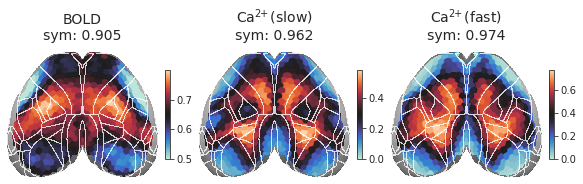

In [28]:
ent = {mode: avg(o.run_h, 1) for mode, o in bt_dict_raw.items()}

fig, axes = create_figure(1, 3, (8, 2.8), tight_layout=False, constrained_layout=True)
for ax, (mode, x) in zip(axes.flat, ent.items()):
    if mode == _BOLD:
        vmin = np.nanmin(x)
        vmin = 0.5
    else:
        vmin = 0
    vmax = np.nanmax(x)
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    ax.set_title(mode, y=1.05, fontsize=14)
    ax.set_title(f"{mode}\nsym: {bt.symmetry_score(x)[0][-1]}", y=1.05, fontsize=14)
remove_ticks(axes)

plt.show()

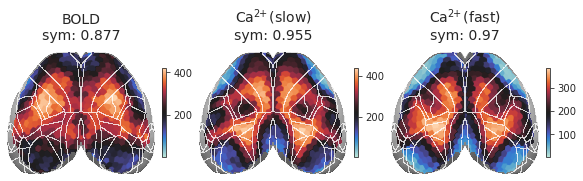

In [29]:
ent = {mode: avg(o.run_hr, 1) for mode, o in bt_dict.items()}

fig, axes = create_figure(1, 3, (8, 2.8), tight_layout=False, constrained_layout=True)
for ax, (mode, x) in zip(axes.flat, ent.items()):
    vmin = 1
    vmax = np.nanmax(x)
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    ax.set_title(mode, y=1.05, fontsize=14)
    ax.set_title(f"{mode}\nsym: {bt.symmetry_score(x)[0][-1]}", y=1.05, fontsize=14)
remove_ticks(axes)

plt.show()

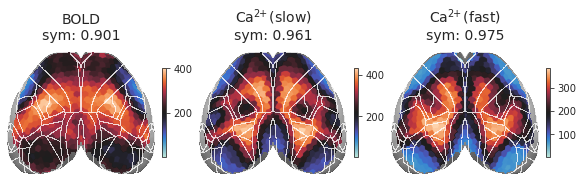

In [30]:
ent = {mode: avg(o.run_hr, 1) for mode, o in bt_dict_raw.items()}

fig, axes = create_figure(1, 3, (8, 2.8), tight_layout=False, constrained_layout=True)
for ax, (mode, x) in zip(axes.flat, ent.items()):
    vmin = 1
    vmax = np.nanmax(x)
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    ax.set_title(f"{mode}\nsym: {bt.symmetry_score(x)[0][-1]}", y=1.05, fontsize=14)
remove_ticks(axes)

plt.show()

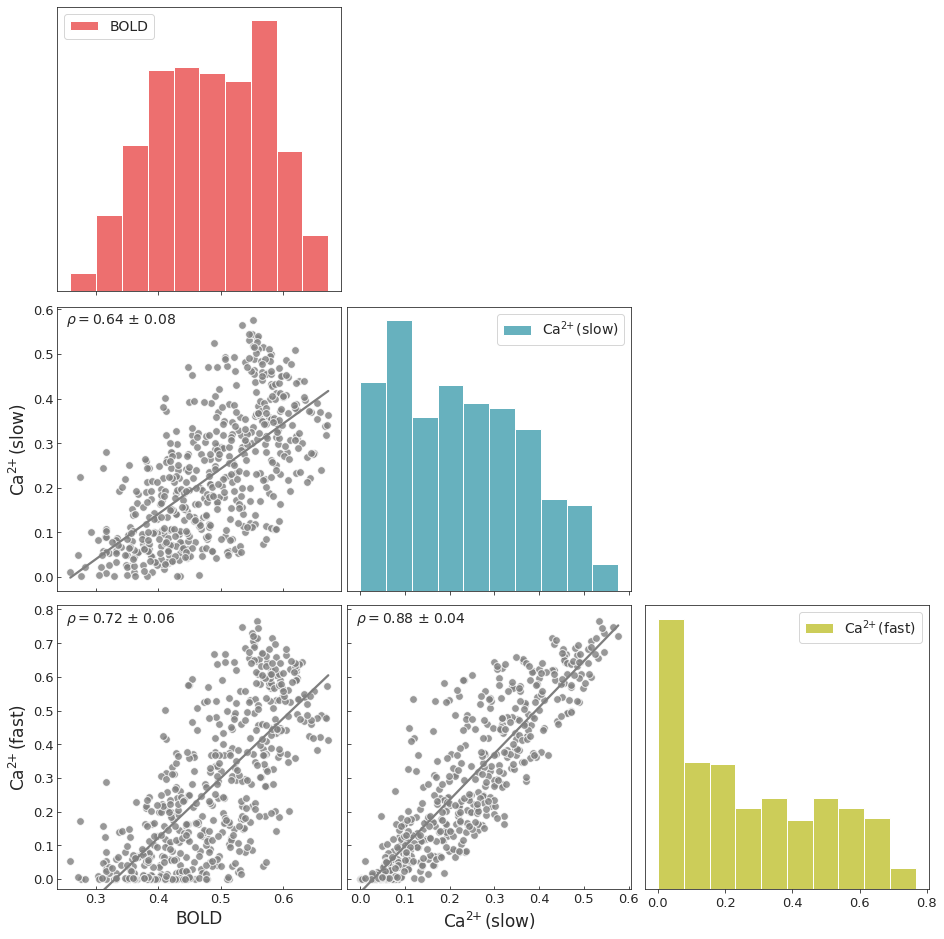

In [16]:
fig, _ = pairwise(
    attr='h',
    bt_dict=bt_dict,
    n_resamples=int(1e2),
)

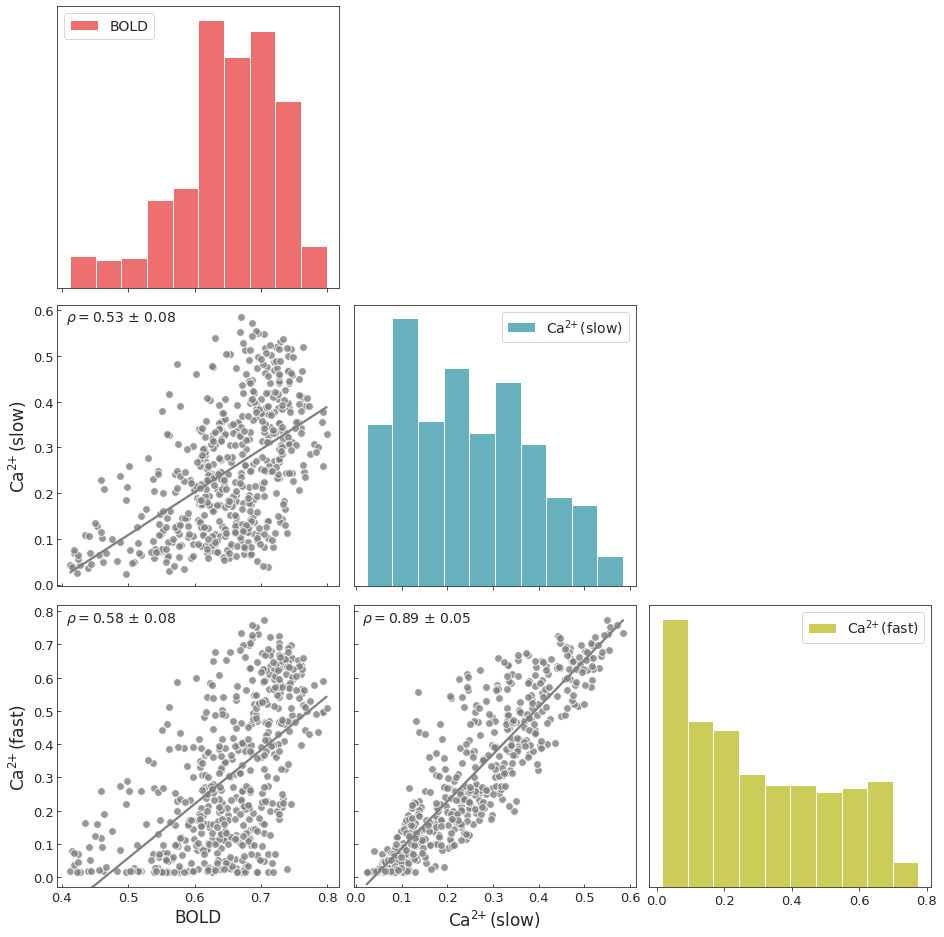

In [17]:
fig, _ = pairwise(
    attr='h',
    bt_dict=bt_dict_raw,
    n_resamples=int(1e2),
)

## Conclusion:

- For Ca, it doesn't matter if use prune or not, so let's just use raw
- For Bo, prune is necessary to increase correlation between modalities
- For rank data, use raw so that their ranks are more symmetric

---
---

On second thought, just use prune for all.  Reduce headache...

---

On third thought, Don't cherry pick seeds.  Just average all.

---

On fourth thought, when k == 3 or 7, and mode == BOLD, then use select seed = on.  Otherwise turn it off.

---
---

## Create and save figs

In [7]:
bt_bo = BootStrap(**props_bo)

mice.setup_func_data(task, band_ca=(0.01, 0.5))
bt_cas = BootStrap(**props_ca)

mice.setup_func_data(task, band_ca=0.5)
bt_caf = BootStrap(**props_ca)

bt_dict = {
    _BOLD: bt_bo,
    _CAS: bt_cas,
    _CAF: bt_caf,
}

In [8]:
%%time

for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=True if mode == _BOLD else False,
    )

CPU times: user 2min 57s, sys: 52.6 s, total: 3min 49s
Wall time: 3min 51s


In [9]:
%%time

cut, se, bins, xs = cut4figs('h', bt_dict, bt.get_booter(int(1e3)))
len(xs), len(bins)

CPU times: user 35.1 s, sys: 5.64 s, total: 40.7 s
Wall time: 40.7 s


(50, 51)

In [10]:
bins

array([0.    , 0.02  , 0.04  , 0.06  , 0.08  , 0.1   , 0.12  , 0.14  ,
       0.16  , 0.18  , 0.2   , 0.22  , 0.24  , 0.26  , 0.28  , 0.3   ,
       0.32  , 0.34  , 0.36  , 0.38  , 0.4   , 0.42  , 0.44  , 0.46  ,
       0.48  , 0.5   , 0.52  , 0.54  , 0.56  , 0.58  , 0.6   , 0.62  ,
       0.64  , 0.66  , 0.68  , 0.7   , 0.72  , 0.74  , 0.76  , 0.78  ,
       0.8   , 0.82  , 0.84  , 0.86  , 0.88  , 0.9   , 0.92  , 0.94  ,
       0.96  , 0.98  , 1.0001])

In [11]:
xs

array([0.  , 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

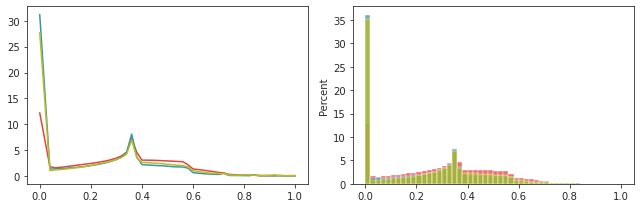

In [12]:
fig, axes = create_figure(1, 2, (9, 3))
for mode, o in bt_dict.items():
    axes[0].plot(xs, avg(cut[mode], 1), color=pal[mode])
    sns.histplot(
        data=o.seed_h[np.isfinite(o.seed_h)],
        bins=bins,
        stat='percent',
        color=pal[mode],
        ax=axes[1],
    )

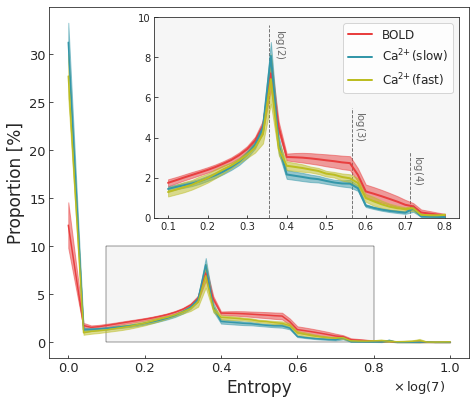

In [13]:
from figures.fig7 import dist_ent_inset as go
fig, _ = go(cut, se, xs, num_k, True)
fig.savefig(pjoin(fig_dir, 'dist.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, 'dist.png'), **kws_fig)

In [14]:
ent = {mode: avg(o.run_h, 1) for mode, o in bt_dict.items()}
{mode: bt.symmetry_score(avg(h, 1))[0][-1] for mode, h in ent.items()}

{'BOLD': 0.86, 'Ca$^{2\\!\\!+}$(slow)': 0.934, 'Ca$^{2\\!\\!+}$(fast)': 0.945}

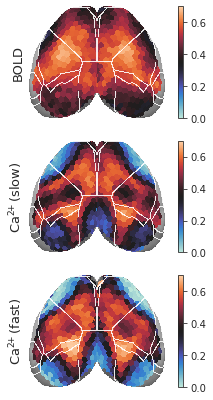

In [15]:
_ = bt.show(
    data=ent,
    figsize=(5, 7),
    vmin=0,
    vmax=0.7,
    add_disjoint=False,
    cmap='icefire',
    cbar=True,
)

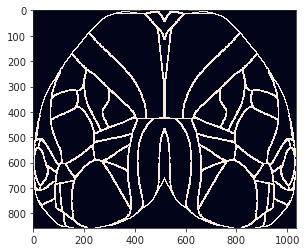

In [16]:
contour = bt.get_contour(0.2, False)
plt.imshow(contour);

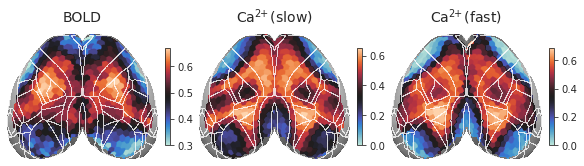

In [17]:
fig, axes = create_figure(1, 3, (8, 2.8), tight_layout=False, constrained_layout=True)
for ax, (mode, x) in zip(axes.flat, ent.items()):
    if mode == _BOLD:
        vmin = np.nanmin(x)
        vmin = 0.3
    else:
        vmin = 0
    vmax = np.nanmax(x)
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    ax.set_title(mode, y=1.05, fontsize=14)
remove_ticks(axes)

# fig.savefig(pjoin(fig_dir, 'ctx.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, 'ctx.png'), **kws_fig)

plt.show()

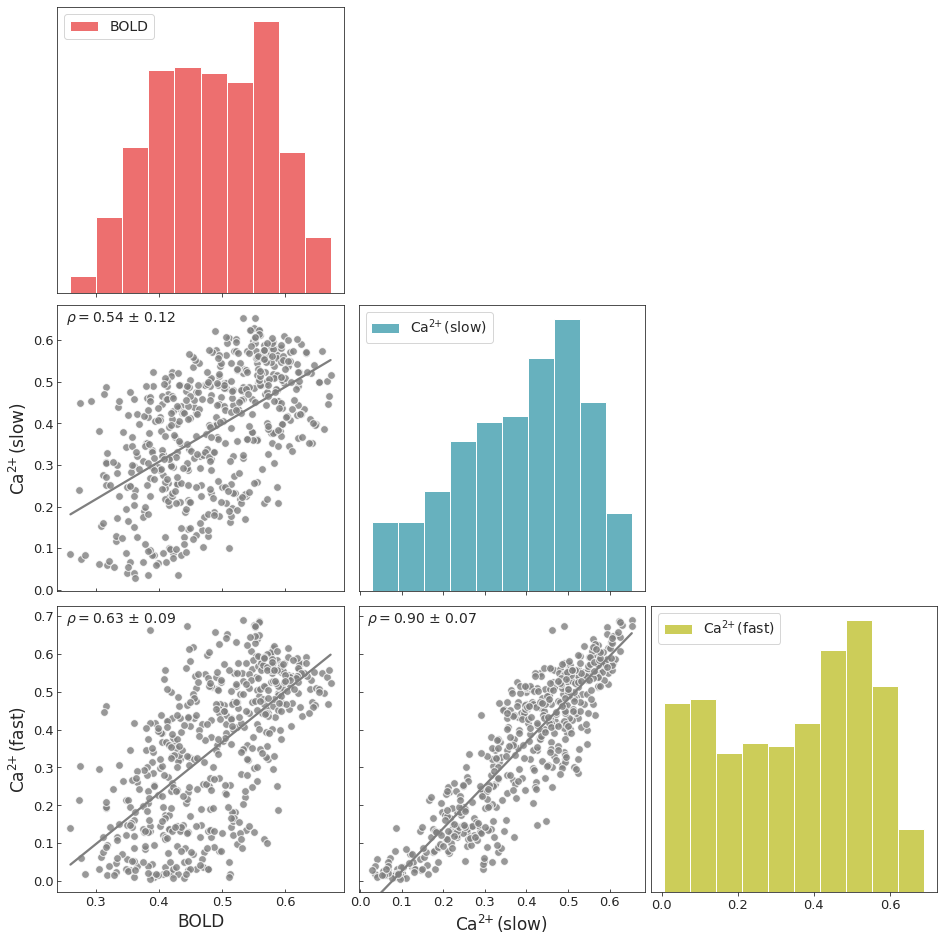

CPU times: user 29.3 s, sys: 325 ms, total: 29.6 s
Wall time: 16 s


In [18]:
%%time

fig, _ = pairwise(
    attr='h',
    bt_dict=bt_dict,
    n_resamples=int(1e4),
)
fig.savefig(pjoin(fig_dir, 'pairwise.pdf'), **kws_fig)
fig.savefig(pjoin(fig_dir, 'pairwise.png'), **kws_fig)

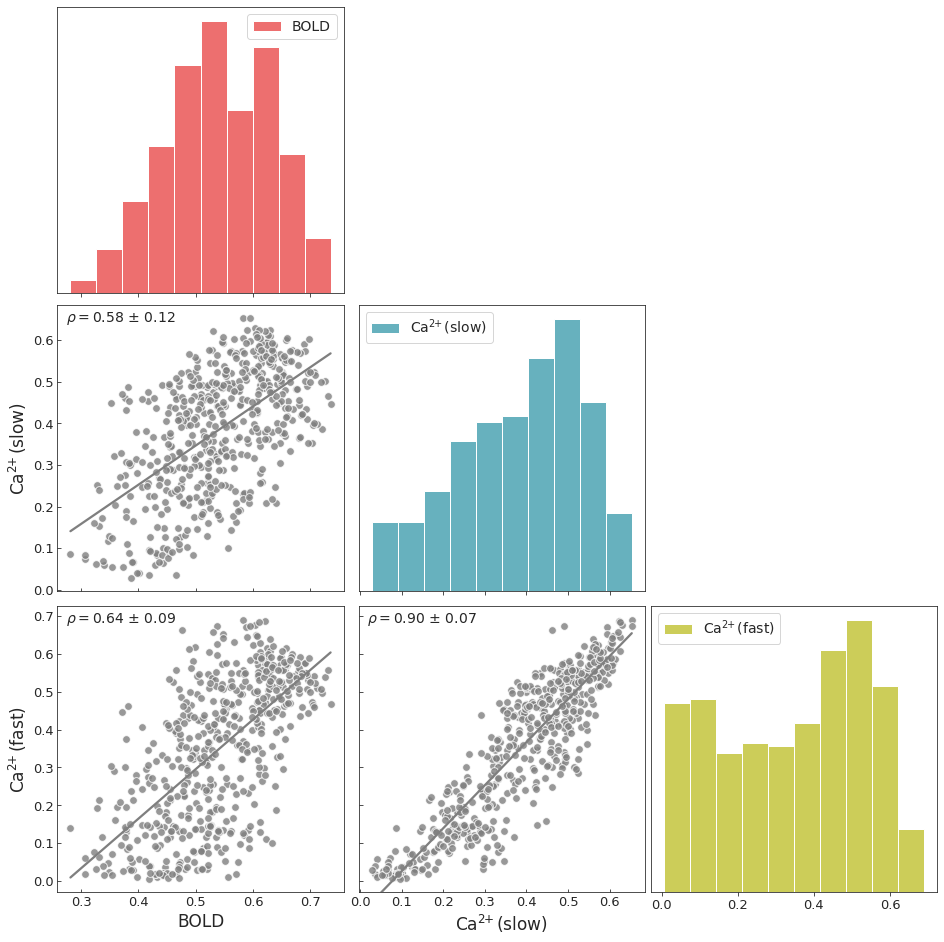

CPU times: user 30.6 s, sys: 423 ms, total: 31 s
Wall time: 16 s


In [19]:
for i, fig_name in {0: 'BOLD', 1: 'CAS', 2: 'CAF'}.items():
    fig, ax = create_figure(1, 1, (3, 2.5), tight_layout=False, constrained_layout=True)
    mode, x = list(ent.items())[i]

    if mode == _BOLD:
        vmin = np.nanmin(x)
        vmin = 0.3
    else:
        vmin = 0
    vmax = np.nanmax(x)
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    
    ax.set_title(mode, y=1.05, fontsize=14)
    remove_ticks(ax)
    
    # fig.savefig(pjoin(fig_dir, f'ctx_{fig_name}.pdf'), **kws_fig)
    fig.savefig(pjoin(fig_dir, f'ctx_{fig_name}.png'), **kws_fig)
    
    plt.close()

## Permutation test

In [20]:
def statistic(a, b, axis):
    return bn.nanmean(a - b, axis=axis)

### Actual values

In [21]:
y = {}
for mode, o in bt_dict.items():
    y[mode] = o.run_h.reshape(-1, o.run_h.shape[-1])

good_runs = ~functools.reduce(
    np.logical_or,
    [np.isnan(e).sum(1) == e.shape[-1] for e in y.values()]
)
y = {k: v[good_runs] for k, v in y.items()}

good_runs.sum()

108

In [22]:
%%time

results = {}
for mode1, mode2 in itertools.combinations(y, 2):
    test = sp_stats.permutation_test(
        data=(y[mode1], y[mode2]),
        statistic=statistic,
        permutation_type='samples',
        alternative='two-sided',
        n_resamples=int(1e5),
        vectorized=True,
        random_state=42,
        batch=5,
        axis=0,
    )
    reject = np_nans(len(test.pvalue))
    pvals = np_nans(len(test.pvalue))
    nonan = np.isfinite(test.pvalue)

    corrected = multipletests(
        pvals=test.pvalue[nonan],
        alpha=0.05,
        method='fdr_bh',
        is_sorted=False,
        returnsorted=False,
    )
    reject[nonan] = corrected[0]
    pvals[nonan] = corrected[1]
    
    results[(mode1, mode2)] = test.statistic, reject, pvals

CPU times: user 4min, sys: 764 ms, total: 4min 1s
Wall time: 4min 1s


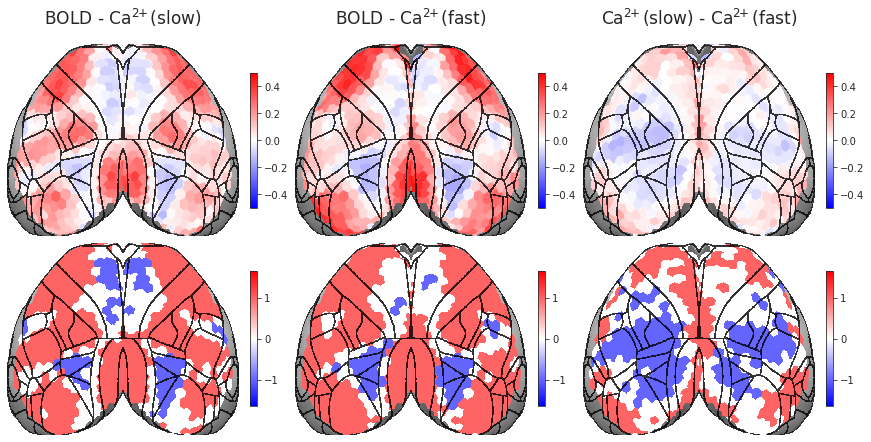

In [23]:
fig, axes = create_figure(2, 3, (12, 6), tight_layout=False, constrained_layout=True)
for i, ((lbl_1, lbl_2), (s, r, p)) in enumerate(results.items()):
    ax = axes[0, i]
    vminmax = 0.5
    ax = ctx2ax(
        x=s,
        ax=ax,
        base=bt,
        vmin=-vminmax,
        vmax=vminmax,
        cmap='bwr',
        cbar_shrink=0.7,
        contour=contour,
        contour_cmap='Greys_r',
    )
    ax.set_title(f"{lbl_1} - {lbl_2}", y=1.07, fontsize=17)
    
    ax = axes[1, i]
    x = s.copy()
    x[x < 0] = -1
    x[x > 0] = 1
    x[r == 0] = 0
    vminmax = 1.65
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=-vminmax,
        vmax=vminmax,
        cmap='bwr',
        cbar_shrink=0.7,
        contour=contour,
        contour_cmap='Greys_r',
        interp='none',
    )
remove_ticks(axes)

fig.savefig(pjoin(fig_dir, 'perm.png'), **kws_fig)

plt.show()

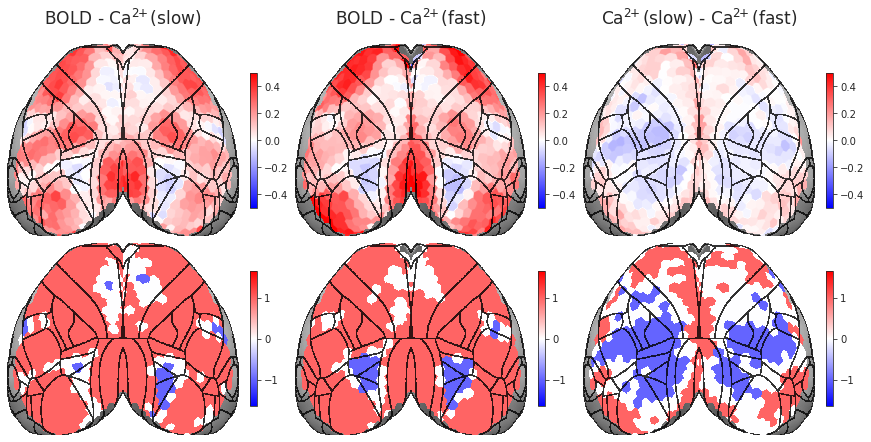

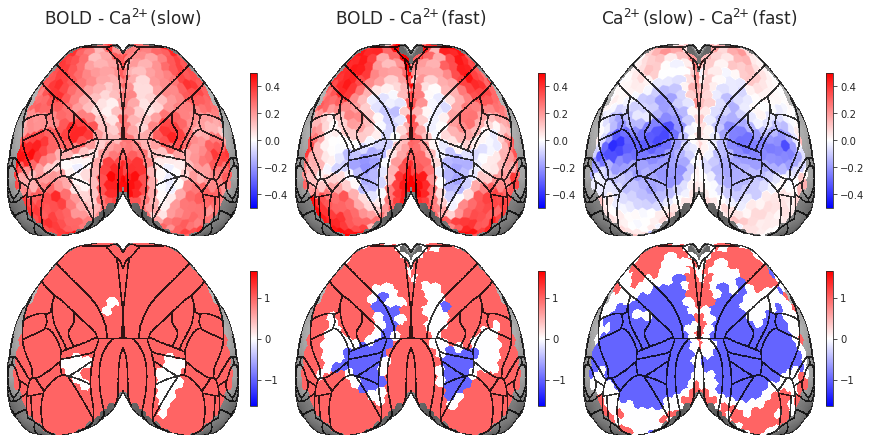

### Ranks

In [24]:
y = {}
for mode, o in bt_dict.items():
    y[mode] = o.run_hr.reshape(-1, o.run_hr.shape[-1])

good_runs = ~functools.reduce(
    np.logical_or,
    [np.isnan(e).sum(1) == e.shape[-1] for e in y.values()]
)
y = {k: v[good_runs] for k, v in y.items()}

good_runs.sum()

108

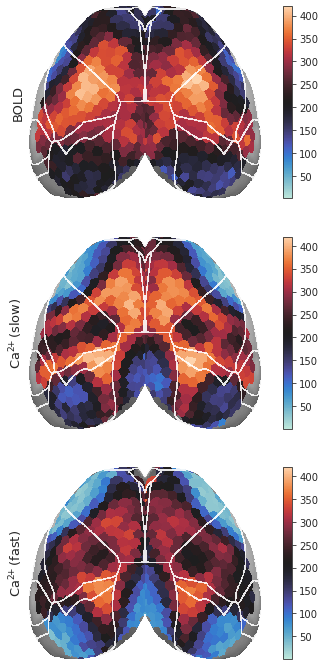

In [25]:
_ = bt.show(
    data={k: bn.nanmean(v, 0) for k, v in y.items()},
    figsize=(8, 12),
    vmin=1,
    vmax=420,
    add_disjoint=False,
    cmap='icefire',
    cbar=True,
)

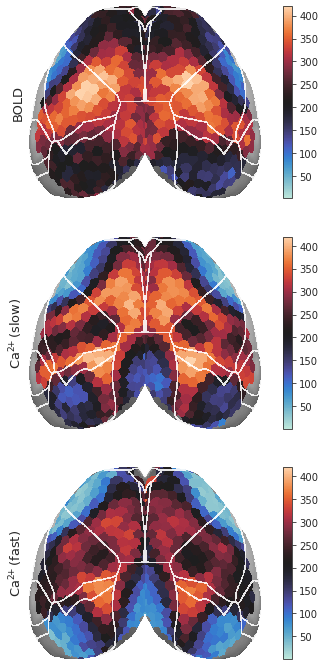

In [26]:
entr = {mode: avg(o.run_hr, 1) for mode, o in bt_dict.items()}

for i, fig_name in {0: 'BOLD', 1: 'CAS', 2: 'CAF'}.items():
    fig, ax = create_figure(1, 1, (3, 2.5), tight_layout=False, constrained_layout=True)
    mode, x = list(entr.items())[i]

    vmin = 0
    vmax = 420
    
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=vmin,
        vmax=vmax,
        cmap='icefire',
        cbar_shrink=0.5,
        contour=contour,
    )
    
    ax.set_title(mode, y=1.05, fontsize=14)
    remove_ticks(ax)
    
    # fig.savefig(pjoin(fig_dir, f'ctx_{fig_name}.pdf'), **kws_fig)
    fig.savefig(pjoin(fig_dir, f'ctx_rank_{fig_name}.png'), **kws_fig)
    
    plt.close()

In [27]:
%%time

results = {}
for mode1, mode2 in itertools.combinations(y, 2):
    test = sp_stats.permutation_test(
        data=(y[mode1], y[mode2]),
        statistic=statistic,
        permutation_type='samples',
        alternative='two-sided',
        n_resamples=int(1e5),
        vectorized=True,
        random_state=42,
        batch=5,
        axis=0,
    )
    reject = np_nans(len(test.pvalue))
    pvals = np_nans(len(test.pvalue))
    nonan = np.isfinite(test.pvalue)

    corrected = multipletests(
        pvals=test.pvalue[nonan],
        alpha=0.05,
        method='fdr_bh',
        is_sorted=False,
        returnsorted=False,
    )
    reject[nonan] = corrected[0]
    pvals[nonan] = corrected[1]
    
    results[(mode1, mode2)] = test.statistic, reject, pvals

CPU times: user 4min 6s, sys: 966 ms, total: 4min 7s
Wall time: 4min 7s


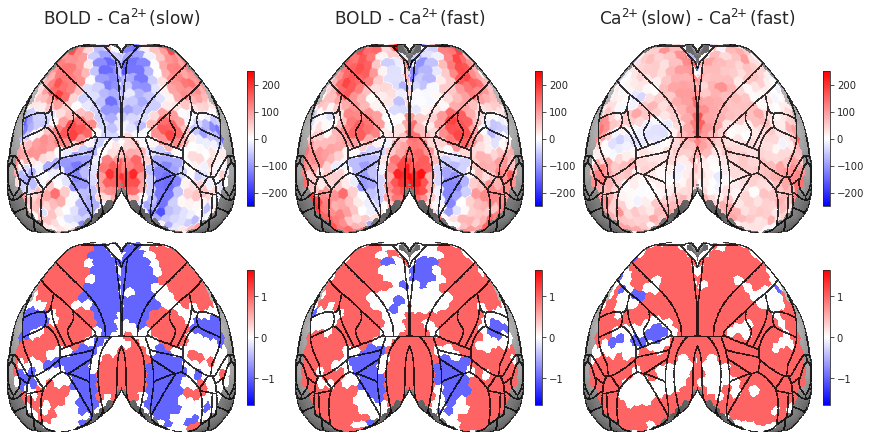

In [28]:
fig, axes = create_figure(2, 3, (12, 6), tight_layout=False, constrained_layout=True)
for i, ((lbl_1, lbl_2), (s, r, p)) in enumerate(results.items()):
    ax = axes[0, i]
    vminmax = 250
    ax = ctx2ax(
        x=s,
        ax=ax,
        base=bt,
        vmin=-vminmax,
        vmax=vminmax,
        cmap='bwr',
        cbar_shrink=0.7,
        contour=contour,
        contour_cmap='Greys_r',
    )
    ax.set_title(f"{lbl_1} - {lbl_2}", y=1.07, fontsize=17)
    
    ax = axes[1, i]
    x = s.copy()
    x[x < 0] = -1
    x[x > 0] = 1
    x[r == 0] = 0
    vminmax = 1.65
    ax = ctx2ax(
        x=x,
        ax=ax,
        base=bt,
        vmin=-vminmax,
        vmax=vminmax,
        cmap='bwr',
        cbar_shrink=0.7,
        contour=contour,
        contour_cmap='Greys_r',
        interp='none',
    )
remove_ticks(axes)

fig.savefig(pjoin(fig_dir, 'perm_rank.png'), **kws_fig)

plt.show()

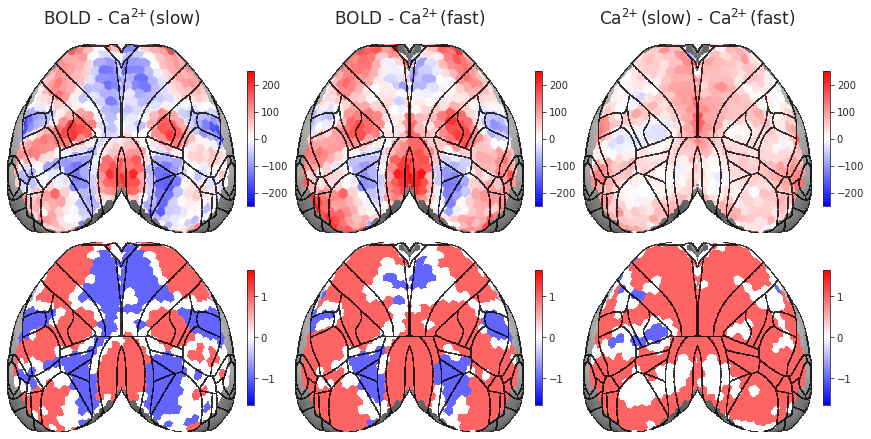

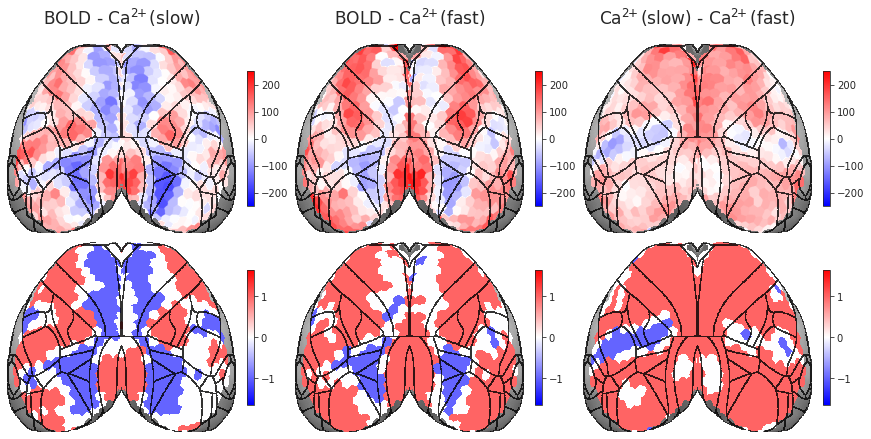

## What about other K?

### Seed selection is bad

  0%|          | 0/3 [00:00<?, ?it/s]

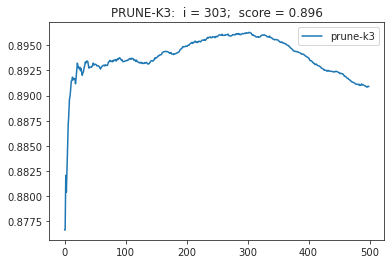

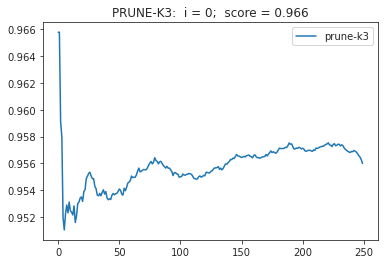

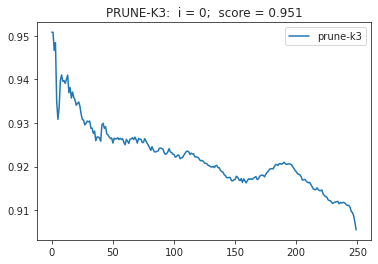

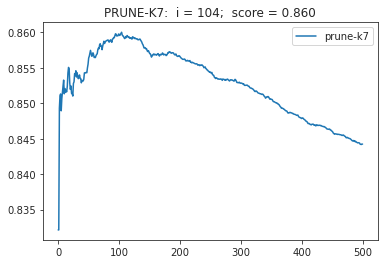

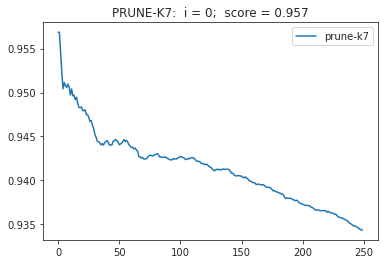

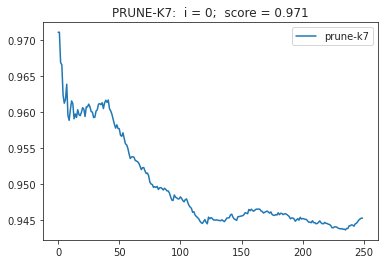

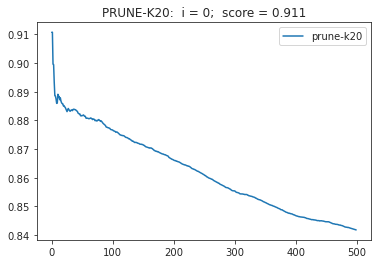

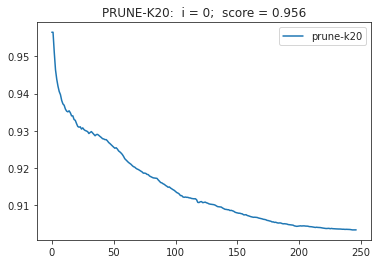

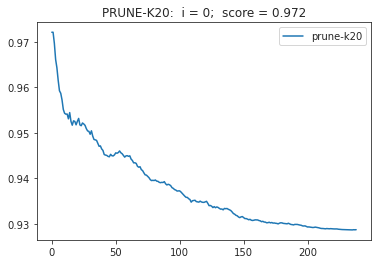

CPU times: user 19min 13s, sys: 7min 34s, total: 26min 48s
Wall time: 27min 14s


In [32]:
%%time

results = {}
for kk in tqdm([3, 7, 20]):
    props_ca['num_k'] = kk
    props_bo['num_k'] = kk

    bt_bo = BootStrap(**props_bo)

    mice.setup_func_data(task, band_ca=(0.01, 0.5))
    bt_cas = BootStrap(**props_ca)

    mice.setup_func_data(task, band_ca=0.5)
    bt_caf = BootStrap(**props_ca)

    bt_dict = {
        _BOLD: bt_bo,
        _CAS: bt_cas,
        _CAF: bt_caf,
    }
    for mode, o in bt_dict.items():
        scores, i = o.compute_entropy(
            use_prune=True,
            select_seeds=True,
        )
        plt.plot(scores, label=f'prune-k{kk}')
        title = f"PRUNE-K{kk}:  i = {i};  score = {scores[i]:0.3f}"
        plt.title(title)
        plt.legend()
        plt.show()
        
    results[kk] = bt_dict

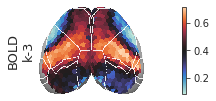

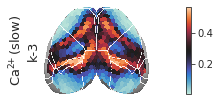

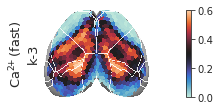

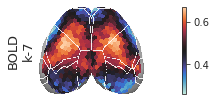

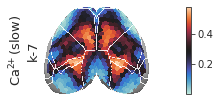

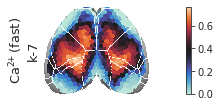

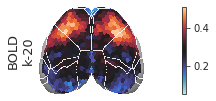

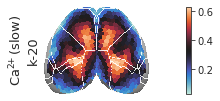

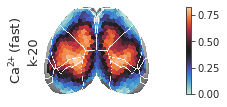

In [38]:
for kk, dd in results.items():
    for mode, o in dd.items():
        x = avg(o.run_h, 1)
        _ = bt.show(
            data={f"{mode}\nk-{kk}": x},
            cmap='icefire',
            vmin=np.nanmin(x),
            vmax=np.nanmax(x),
            cbar=True,
            add_disjoint=False,
        )

### Seed select = Off is good

In [28]:
results = {}
for kk in tqdm([3, 7, 20]):
    props_ca['num_k'] = kk
    props_bo['num_k'] = kk

    bt_bo = BootStrap(**props_bo)

    mice.setup_func_data(task, band_ca=(0.01, 0.5))
    bt_cas = BootStrap(**props_ca)

    mice.setup_func_data(task, band_ca=0.5)
    bt_caf = BootStrap(**props_ca)

    bt_dict = {
        _BOLD: bt_bo,
        _CAS: bt_cas,
        _CAF: bt_caf,
    }
    for mode, o in bt_dict.items():
        _ = o.compute_entropy(
            use_prune=True,
            select_seeds=False,
        )
    results[kk] = bt_dict

  0%|          | 0/3 [00:00<?, ?it/s]

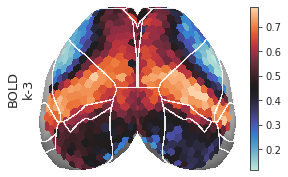

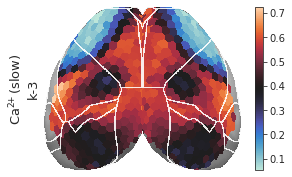

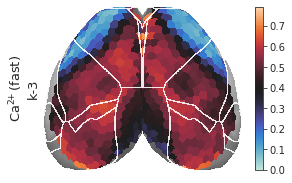

----------------------------------------------------------------------

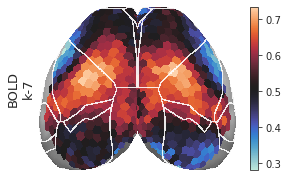

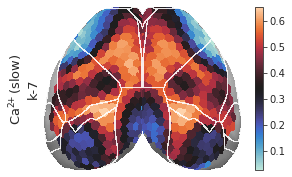

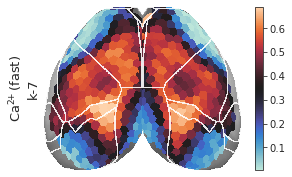

----------------------------------------------------------------------

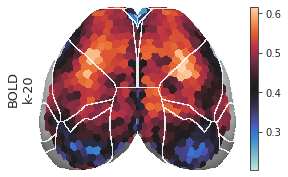

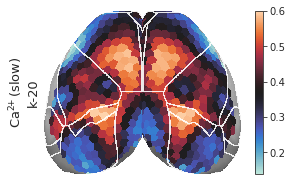

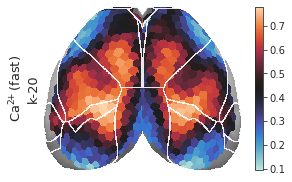

----------------------------------------------------------------------

In [30]:
for kk, dd in results.items():
    for mode, o in dd.items():
        x = avg(o.run_h, 1)
        _ = bt.show(
            data={f"{mode}\nk-{kk}": x},
            cmap='icefire',
            vmin=np.nanmin(x),
            vmax=np.nanmax(x),
            figsize=(5, 3),
            cbar=True,
            add_disjoint=False,
        )
    print('-' * 70)

### Continue from here

### OLD and bad seed selection from before

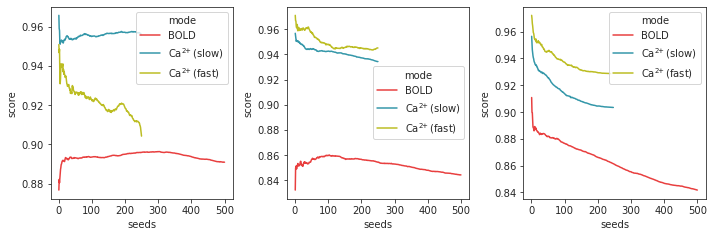

In [54]:
fig, axes = create_figure(1, 3, (10, 3.4))
for ax, kk in zip(axes.flat, df['k'].unique()):
    sns.lineplot(
        data=df.loc[df['k'] == kk],
        x='seeds',
        y='score',
        hue='mode',
        palette=pal,
        ax=ax,
    )
plt.show()

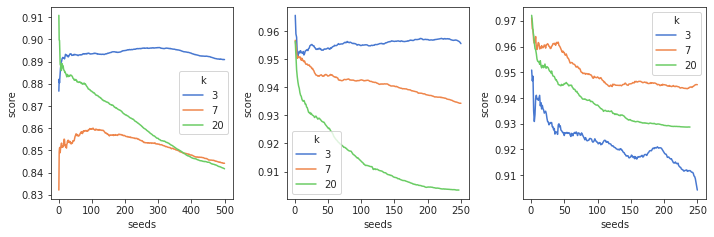

In [58]:
fig, axes = create_figure(1, 3, (10, 3.4))
for ax, mode in zip(axes.flat, df['mode'].unique()):
    sns.lineplot(
        data=df.loc[df['mode'] == mode],
        x='seeds',
        y='score',
        hue='k',
        palette='muted',
        ax=ax,
    )
plt.show()

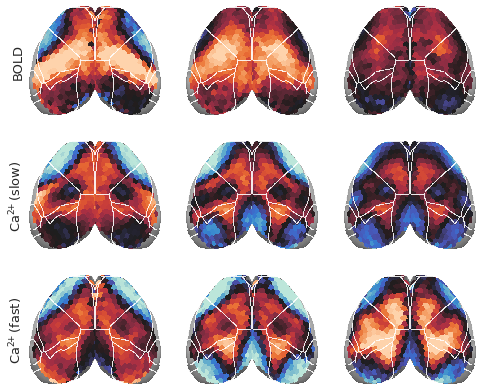

In [102]:
_ = bt.show(
    data=final,
    vmin=0.1,
    vmax=0.7,
    figsize=(8, 7),
    cmap='icefire',
    add_disjoint=False,
)

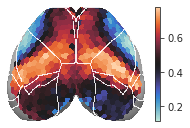

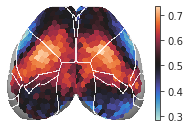

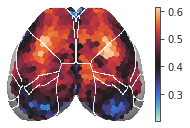

In [103]:
for x in final[_BOLD]:
    _ = bt.show(
        data=x,
        vmin=np.nanmin(x),
        vmax=np.nanmax(x),
        cbar=True,
        figsize=(3.5, 2.1),
        cmap='icefire',
        add_disjoint=False,
    )

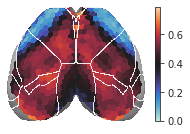

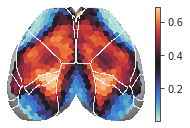

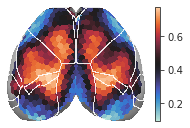

In [93]:
for x in final[_CAF]:
    _ = bt.show(
        data=x,
        vmin=np.nanmin(x),
        vmax=np.nanmax(x),
        cbar=True,
        figsize=(3.5, 2.1),
        cmap='icefire',
        add_disjoint=False,
    )

In [101]:
for mode in final:
    x = final[mode]
    good = np.isnan(x).sum(0) == 0
    sim = dist2sim(sp_dist.squareform(sp_dist.pdist(
        X=x[:, good],
        metric='correlation',
    )))
    print(mode, '\n', np.round(sim, 2))

BOLD 
 [[1.   0.84 0.31]
 [0.84 1.   0.54]
 [0.31 0.54 1.  ]]

Ca$^{2\!\!+}$(slow) 
 [[1.   0.75 0.51]
 [0.75 1.   0.88]
 [0.51 0.88 1.  ]]

Ca$^{2\!\!+}$(fast) 
 [[1.   0.61 0.47]
 [0.61 1.   0.91]
 [0.47 0.91 1.  ]]

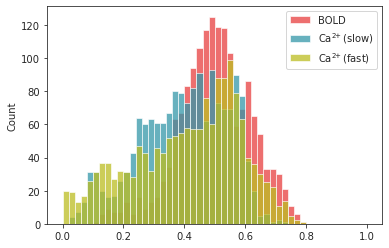

In [84]:
bins = np.linspace(0, 1, 51)
for mode, x in final.items():
    sns.histplot(x.ravel(), color=pal[mode], bins=bins, label=mode)
plt.legend();

## Old stuff, ignore

In [47]:
x = np.concatenate([
    np.expand_dims(bt_cas.run_h, -2),
    np.expand_dims(bt_caf.run_h, -2),
], axis=-2)
x.shape

(10, 3, 4, 2, 542)

In [48]:
sim = np_nans((10, 3, 4, 1))
for i, j, k in itertools.product(range(10), range(3), range(4)):
    _x = x[i, j, k]
    good = np.isnan(_x).sum(0) == 0
    if not good.sum():
        continue
    d = sp_dist.pdist(_x[:, good], metric='correlation').item()
    if np.isnan(d):
        continue
    sim[i, j, k] = dist2sim(d)

In [49]:
avg(sim, 1)

array([0.61854519])

<AxesSubplot:ylabel='Count'>

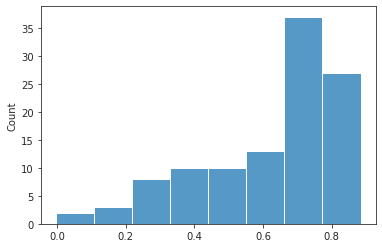

In [50]:
sns.histplot(sim.ravel())

In [51]:
low_sim = [(i, j, k) for i, j, k, _ in zip(*np.where(sim < 0.3))]
low_sim = [k for k, v in bt_cas.address.items() if v in low_sim]
low_sim

[
    'sub-SLC03_ses-3_run-5',
    'sub-SLC03_ses-3_run-7',
    'sub-SLC04_ses-1_run-3',
    'sub-SLC04_ses-1_run-5',
    'sub-SLC04_ses-1_run-7',
    'sub-SLC04_ses-2_run-5',
    'sub-SLC04_ses-3_run-5',
    'sub-SLC05_ses-1_run-3',
    'sub-SLC05_ses-1_run-5',
    'sub-SLC05_ses-2_run-7'
]

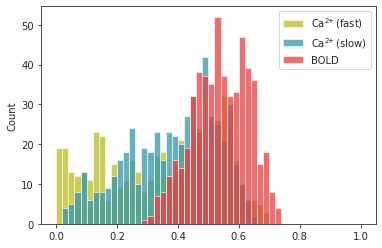

In [52]:
bins = np.linspace(0, 1, 51)
sns.histplot(avg(bt_caf.run_h, 1), color=pal[_CAF], bins=bins, label=_CAF)
sns.histplot(avg(bt_cas.run_h, 1), color=pal[_CAS], bins=bins, label=_CAS)
sns.histplot(avg(bt_bo.run_h, 1), color=pal[_BOLD], bins=bins, label=_BOLD)
plt.legend();